# Clustering Non Supervisé avec K-Means
## Analyse de Segmentation de la Clientèle

Ce notebook présente une analyse de clustering non supervisé utilisant l'algorithme K-Means pour identifier des segments de clients basés sur leurs caractéristiques comportementales et démographiques.

**Objectifs :**
- Identifier des groupes naturels de clients
- Déterminer le nombre optimal de clusters
- Analyser et interpréter les profils de segments de clientèle
- Évaluer la qualité du clustering

## 1. Import des Bibliothèques Requises

In [27]:
# Bibliothèques de base
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Machine Learning - Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Configuration des graphiques
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("husl")

print("✅ Bibliothèques importées avec succès!")

✅ Bibliothèques importées avec succès!


## 2. Chargement et Exploration du Dataset

In [28]:
# Chargement des données
data = pd.read_csv('data/processed/marketing_campaign_pca.csv')

print("📊 Informations sur le dataset:")
print(f"Forme du dataset: {data.shape}")
print(f"Colonnes: {list(data.columns)}")
print("\n" + "="*50 + "\n")

# Affichage des premières lignes
print("🔍 Aperçu des premières lignes:")
display(data.head())

print("\n" + "="*50 + "\n")

# Informations détaillées
print("📋 Informations détaillées:")
print(data.info())

print("\n" + "="*50 + "\n")

# Statistiques descriptives
print("📈 Statistiques descriptives:")
display(data.describe())

📊 Informations sur le dataset:
Forme du dataset: (2029, 8)
Colonnes: ['ID', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']


🔍 Aperçu des premières lignes:


,ID,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,5524,18.934799,7.725264,18.583081,0.648671,3.050537,-8.183085,9.137108
1,2174,-14.686268,10.233510,1.184290,12.299666,-7.031763,0.335922,6.761895
2,4141,-1.447044,-3.798188,-3.161065,-20.371679,9.351176,-4.118962,-3.537210
3,6182,-10.361667,-12.589759,5.683531,7.901662,2.565497,-7.514150,-8.246575
4,5324,-5.595235,1.936591,11.723519,0.347709,-5.435565,-10.492050,0.936964




📋 Informations détaillées:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2029 non-null   int64  
 1   PC1     2029 non-null   float64
 2   PC2     2029 non-null   float64
 3   PC3     2029 non-null   float64
 4   PC4     2029 non-null   float64
 5   PC5     2029 non-null   float64
 6   PC6     2029 non-null   float64
 7   PC7     2029 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 126.9 KB
None


📈 Statistiques descriptives:


,ID,PC1,PC2,PC3,PC4,PC5,PC6,PC7
count,2029.000000,2.029000e+03,2.029000e+03,2.029000e+03,2.029000e+03,2.029000e+03,2.029000e+03,2.029000e+03
mean,5597.183834,-1.148635e-15,1.120619e-16,-2.521394e-16,2.143185e-15,-1.134627e-15,-6.443562e-16,-4.482478e-16
std,3258.848989,1.618601e+01,1.452830e+01,1.252755e+01,1.135378e+01,9.899734e+00,7.485705e+00,6.338471e+00
min,0.000000,-3.318541e+01,-4.829524e+01,-4.978748e+01,-5.170654e+01,-5.434154e+01,-4.081619e+01,-2.218396e+01
25%,2804.000000,-1.004742e+01,-9.745106e+00,-8.083292e+00,-7.928591e+00,-6.498248e+00,-3.786723e+00,-4.520747e+00
50%,5519.000000,-3.923024e+00,-2.398086e-01,1.208345e-01,-1.815138e-01,3.889357e-01,6.248556e-01,-7.235128e-01
75%,8442.000000,5.148064e+00,1.001774e+01,8.274830e+00,7.382446e+00,6.536546e+00,4.456392e+00,3.867651e+00
max,11191.000000,7.769531e+01,8.185859e+01,6.950422e+01,5.713775e+01,6.582521e+01,4.646266e+01,3.943179e+01


## 3. Préparation des Données pour le Clustering

🎯 Toutes les features utilisées pour le clustering (dataset pré-optimisé):
Features: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
Nombre de features: 7
Forme des données de clustering: (2029, 7)

📋 Analyse des types de variables:
  • PC1: 2028 valeurs uniques, type: float64
  • PC2: 2028 valeurs uniques, type: float64
  • PC3: 2028 valeurs uniques, type: float64
  • PC4: 2028 valeurs uniques, type: float64
  • PC5: 2028 valeurs uniques, type: float64
  • PC6: 2028 valeurs uniques, type: float64
  • PC7: 2028 valeurs uniques, type: float64

🔍 Vérification des valeurs manquantes:
Aucune valeur manquante détectée ✅

📏 Données standardisées:
Moyennes après standardisation: [0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0]
Écarts-types après standardisation: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


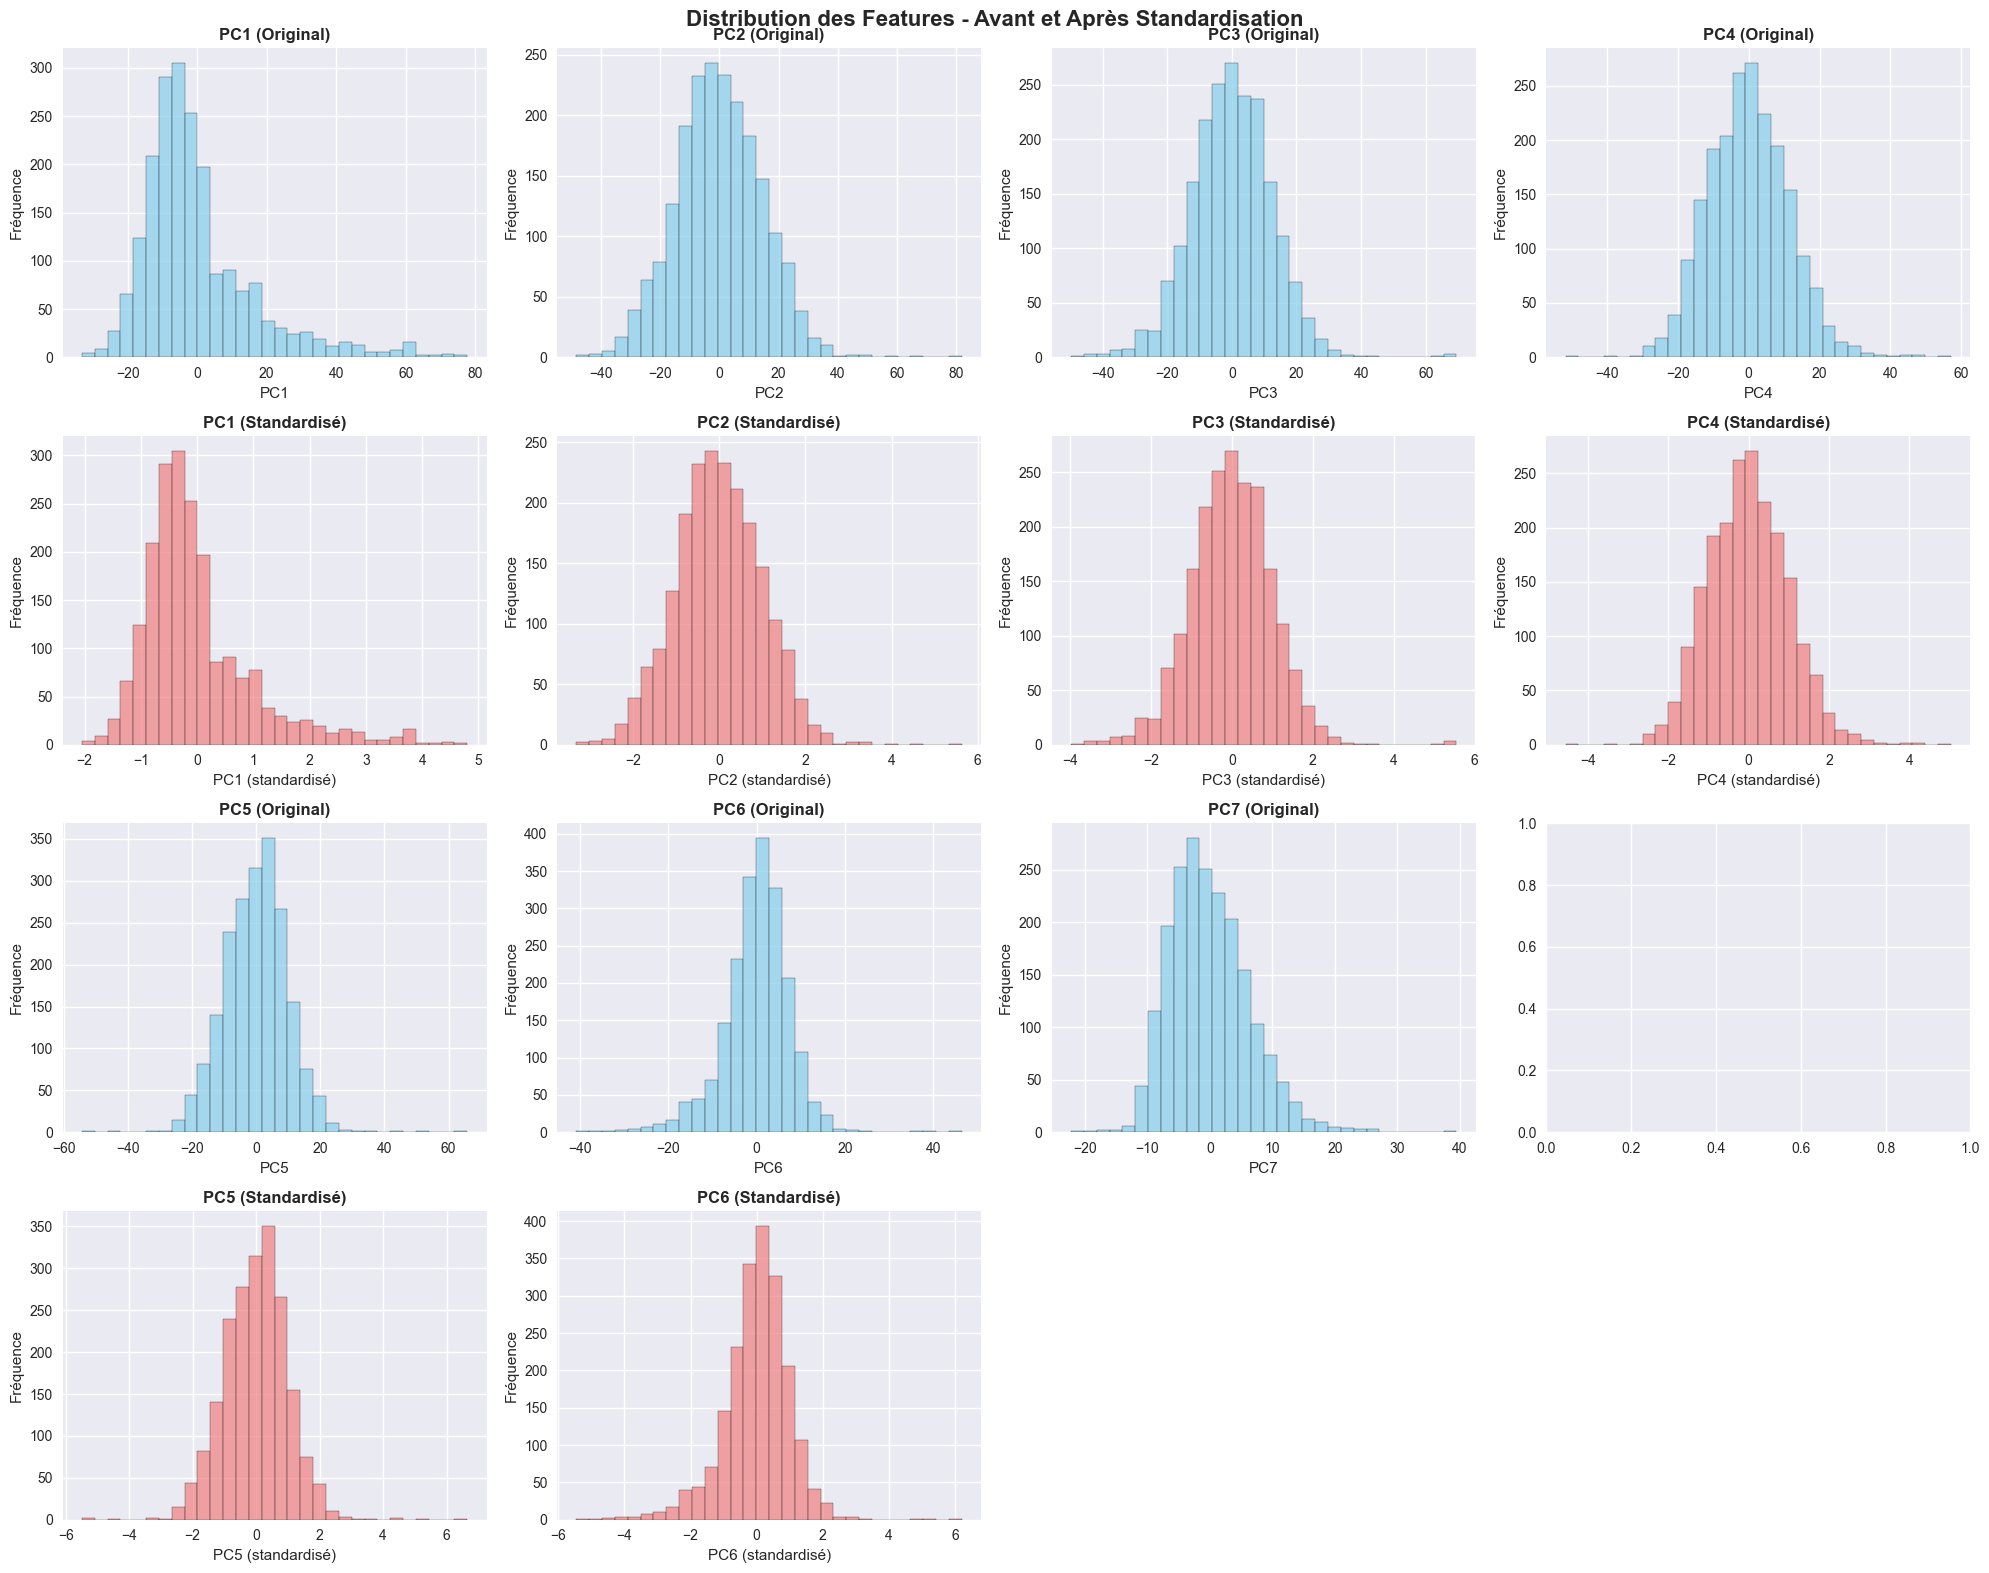


✅ Données préparées pour le clustering: (2029, 7)


In [29]:
# Utilisation de toutes les features disponibles (dataset déjà optimisé pour le clustering)
# Exclusion uniquement de l'ID qui n'est pas une feature pertinente
features_for_clustering = [col for col in data.columns if col != 'ID']
clustering_data = data[features_for_clustering].copy()

print("🎯 Toutes les features utilisées pour le clustering (dataset pré-optimisé):")
print(f"Features: {features_for_clustering}")
print(f"Nombre de features: {len(features_for_clustering)}")
print(f"Forme des données de clustering: {clustering_data.shape}")

# Analyse des types de variables
print(f"\n📋 Analyse des types de variables:")
for feature in features_for_clustering:
    unique_values = data[feature].nunique()
    dtype = data[feature].dtype
    print(f"  • {feature}: {unique_values} valeurs uniques, type: {dtype}")

# Vérification des valeurs manquantes
print("\n🔍 Vérification des valeurs manquantes:")
missing_values = clustering_data.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "Aucune valeur manquante détectée ✅")

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clustering_data)
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_clustering, index=clustering_data.index)

print("\n📏 Données standardisées:")
print("Moyennes après standardisation:", X_scaled_df.mean().round(3).tolist())
print("Écarts-types après standardisation:", X_scaled_df.std().round(3).tolist())

# Affichage des statistiques avant et après standardisation
# Adaptation dynamique au nombre de features
n_features = len(features_for_clustering)
n_cols = min(4, n_features)  # Maximum 4 colonnes
n_rows = 2 * ((n_features + n_cols - 1) // n_cols)  # 2 lignes par feature (avant/après)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
fig.suptitle('Distribution des Features - Avant et Après Standardisation', fontsize=16, fontweight='bold')

# Si une seule feature, convertir axes en array 2D
if n_features == 1:
    axes = axes.reshape(2, 1)
elif n_cols == 1:
    axes = axes.reshape(-1, 1)

for i, feature in enumerate(features_for_clustering):
    row_orig = (i // n_cols) * 2  # Ligne pour version originale
    row_std = row_orig + 1         # Ligne pour version standardisée
    col = i % n_cols
    
    # Avant standardisation
    if n_cols == 1:
        ax_orig = axes[row_orig, 0] if n_rows > 1 else axes[row_orig]
        ax_std = axes[row_std, 0] if n_rows > 1 else axes[row_std]
    else:
        ax_orig = axes[row_orig, col] if n_rows > 1 else axes[col]
        ax_std = axes[row_std, col] if n_rows > 1 else axes[col]
    
    ax_orig.hist(clustering_data[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    ax_orig.set_title(f'{feature} (Original)', fontweight='bold')
    ax_orig.set_xlabel(feature)
    ax_orig.set_ylabel('Fréquence')
    
    # Après standardisation
    ax_std.hist(X_scaled_df[feature], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
    ax_std.set_title(f'{feature} (Standardisé)', fontweight='bold')
    ax_std.set_xlabel(f'{feature} (standardisé)')
    ax_std.set_ylabel('Fréquence')

# Masquer les axes inutilisés s'il y en a
total_subplots = n_rows * n_cols
used_subplots = n_features * 2
if used_subplots < total_subplots:
    for idx in range(used_subplots, total_subplots):
        row = idx // n_cols
        col = idx % n_cols
        if n_cols == 1:
            axes[row, 0].set_visible(False) if n_rows > 1 else axes[row].set_visible(False)
        else:
            axes[row, col].set_visible(False) if n_rows > 1 else axes[col].set_visible(False)

plt.tight_layout()
plt.show()

print(f"\n✅ Données préparées pour le clustering: {X_scaled.shape}")

## 4. Détermination du Nombre Optimal de Clusters

🔄 Calcul en cours pour différents nombres de clusters...
k=2: WCSS=12677.27, Silhouette Score=0.122
k=3: WCSS=11367.55, Silhouette Score=0.137
k=4: WCSS=10200.89, Silhouette Score=0.150
k=5: WCSS=9232.26, Silhouette Score=0.167
k=6: WCSS=8448.25, Silhouette Score=0.164
k=7: WCSS=7890.77, Silhouette Score=0.162
k=8: WCSS=7407.58, Silhouette Score=0.163
k=9: WCSS=7147.60, Silhouette Score=0.157
k=10: WCSS=6918.97, Silhouette Score=0.156


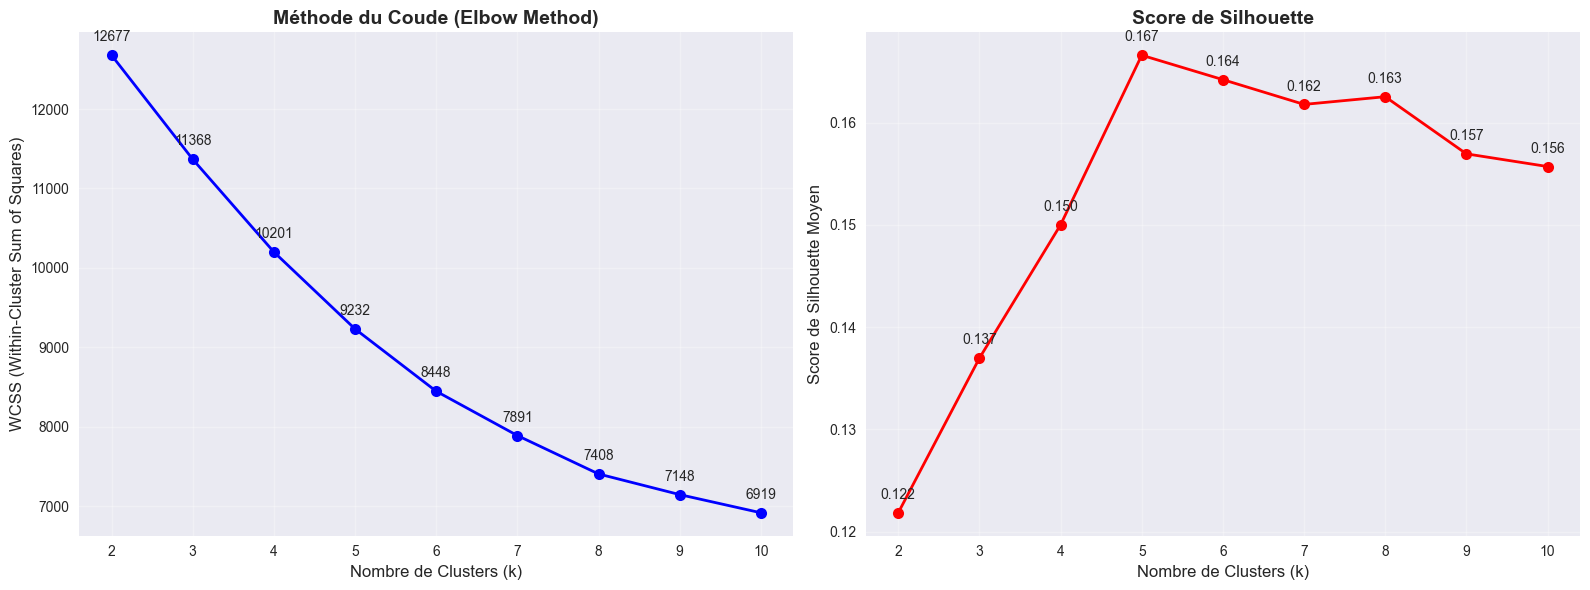


🎯 Meilleur score de silhouette: k=5 (score=0.167)

Analyse de la méthode du coude:
k=3: Réduction WCSS = 1309.72
k=4: Réduction WCSS = 1166.66
k=5: Réduction WCSS = 968.63
k=6: Réduction WCSS = 784.01
k=7: Réduction WCSS = 557.48
k=8: Réduction WCSS = 483.19
k=9: Réduction WCSS = 259.98

✅ Nombre optimal de clusters recommandé: k=5


In [30]:
# Méthode du coude (Elbow Method) et analyse de la silhouette
k_range = range(2, 11)
wcss = []  # Within-Cluster Sum of Squares
silhouette_scores = []

print("🔄 Calcul en cours pour différents nombres de clusters...")

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
    # Calcul du score de silhouette
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
    print(f"k={k}: WCSS={kmeans.inertia_:.2f}, Silhouette Score={silhouette_avg:.3f}")

# Visualisation des résultats
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Méthode du coude
ax1.plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
ax1.set_title('Méthode du Coude (Elbow Method)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Nombre de Clusters (k)', fontsize=12)
ax1.set_ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
ax1.grid(True, alpha=0.3)

# Ajout d'annotations pour les points
for i, (k, wcss_val) in enumerate(zip(k_range, wcss)):
    ax1.annotate(f'{wcss_val:.0f}', (k, wcss_val), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=10)

# Score de silhouette
ax2.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_title('Score de Silhouette', fontsize=14, fontweight='bold')
ax2.set_xlabel('Nombre de Clusters (k)', fontsize=12)
ax2.set_ylabel('Score de Silhouette Moyen', fontsize=12)
ax2.grid(True, alpha=0.3)

# Ajout d'annotations pour les scores de silhouette
for i, (k, score) in enumerate(zip(k_range, silhouette_scores)):
    ax2.annotate(f'{score:.3f}', (k, score), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Identification du nombre optimal de clusters
best_silhouette_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\n🎯 Meilleur score de silhouette: k={best_silhouette_k} (score={max(silhouette_scores):.3f})")

# Calcul de la variation du WCSS pour identifier le coude
wcss_diff = [wcss[i-1] - wcss[i] for i in range(1, len(wcss))]
wcss_diff2 = [wcss_diff[i-1] - wcss_diff[i] for i in range(1, len(wcss_diff))]

print("\nAnalyse de la méthode du coude:")
for i, k in enumerate(k_range[1:], 1):
    if i < len(wcss_diff):
        print(f"k={k}: Réduction WCSS = {wcss_diff[i-1]:.2f}")

# Recommandation
optimal_k = best_silhouette_k
print(f"\n✅ Nombre optimal de clusters recommandé: k={optimal_k}")

## 5. Application du Clustering K-Means

🎯 K-means appliqué avec k=5 clusters
Nombre de points de données: 2029

📊 Distribution des clusters:
Cluster 0: 308 clients (15.2%)
Cluster 1: 747 clients (36.8%)
Cluster 2: 458 clients (22.6%)
Cluster 3: 328 clients (16.2%)
Cluster 4: 188 clients (9.3%)


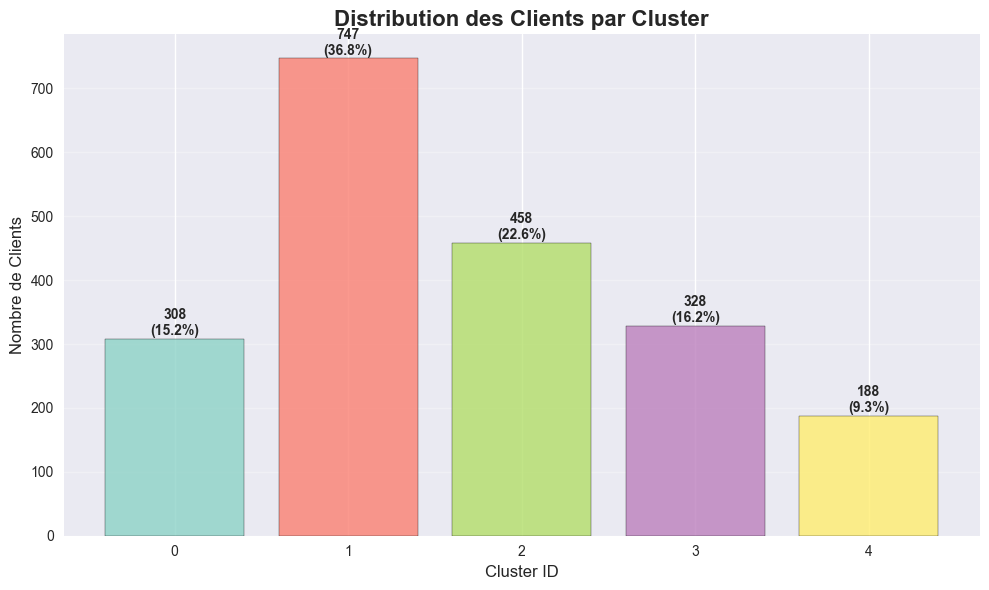


✅ Clustering terminé! Les données avec les labels de clusters sont disponibles dans 'data_clustered'.


In [31]:
# Application du K-means avec le nombre optimal de clusters
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = final_kmeans.fit_predict(X_scaled)

print(f"🎯 K-means appliqué avec k={optimal_k} clusters")
print(f"Nombre de points de données: {len(cluster_labels)}")

# Ajout des labels de clusters aux données originales
data_clustered = data.copy()
data_clustered['Cluster'] = cluster_labels

# Affichage de la distribution des clusters
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
print(f"\n📊 Distribution des clusters:")
for cluster_id, count in cluster_counts.items():
    percentage = (count / len(cluster_labels)) * 100
    print(f"Cluster {cluster_id}: {count} clients ({percentage:.1f}%)")

# Visualisation de la distribution des clusters
plt.figure(figsize=(10, 6))
colors = plt.cm.Set3(np.linspace(0, 1, optimal_k))
bars = plt.bar(cluster_counts.index, cluster_counts.values, color=colors, alpha=0.8, edgecolor='black')

plt.title('Distribution des Clients par Cluster', fontsize=16, fontweight='bold')
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Nombre de Clients', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Ajout des étiquettes sur les barres
for bar, count in zip(bars, cluster_counts.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{count}\n({count/len(cluster_labels)*100:.1f}%)',
             ha='center', va='bottom', fontweight='bold')

plt.xticks(cluster_counts.index)
plt.tight_layout()
plt.show()

print(f"\n✅ Clustering terminé! Les données avec les labels de clusters sont disponibles dans 'data_clustered'.")

## 6. Visualisation des Résultats du Clustering

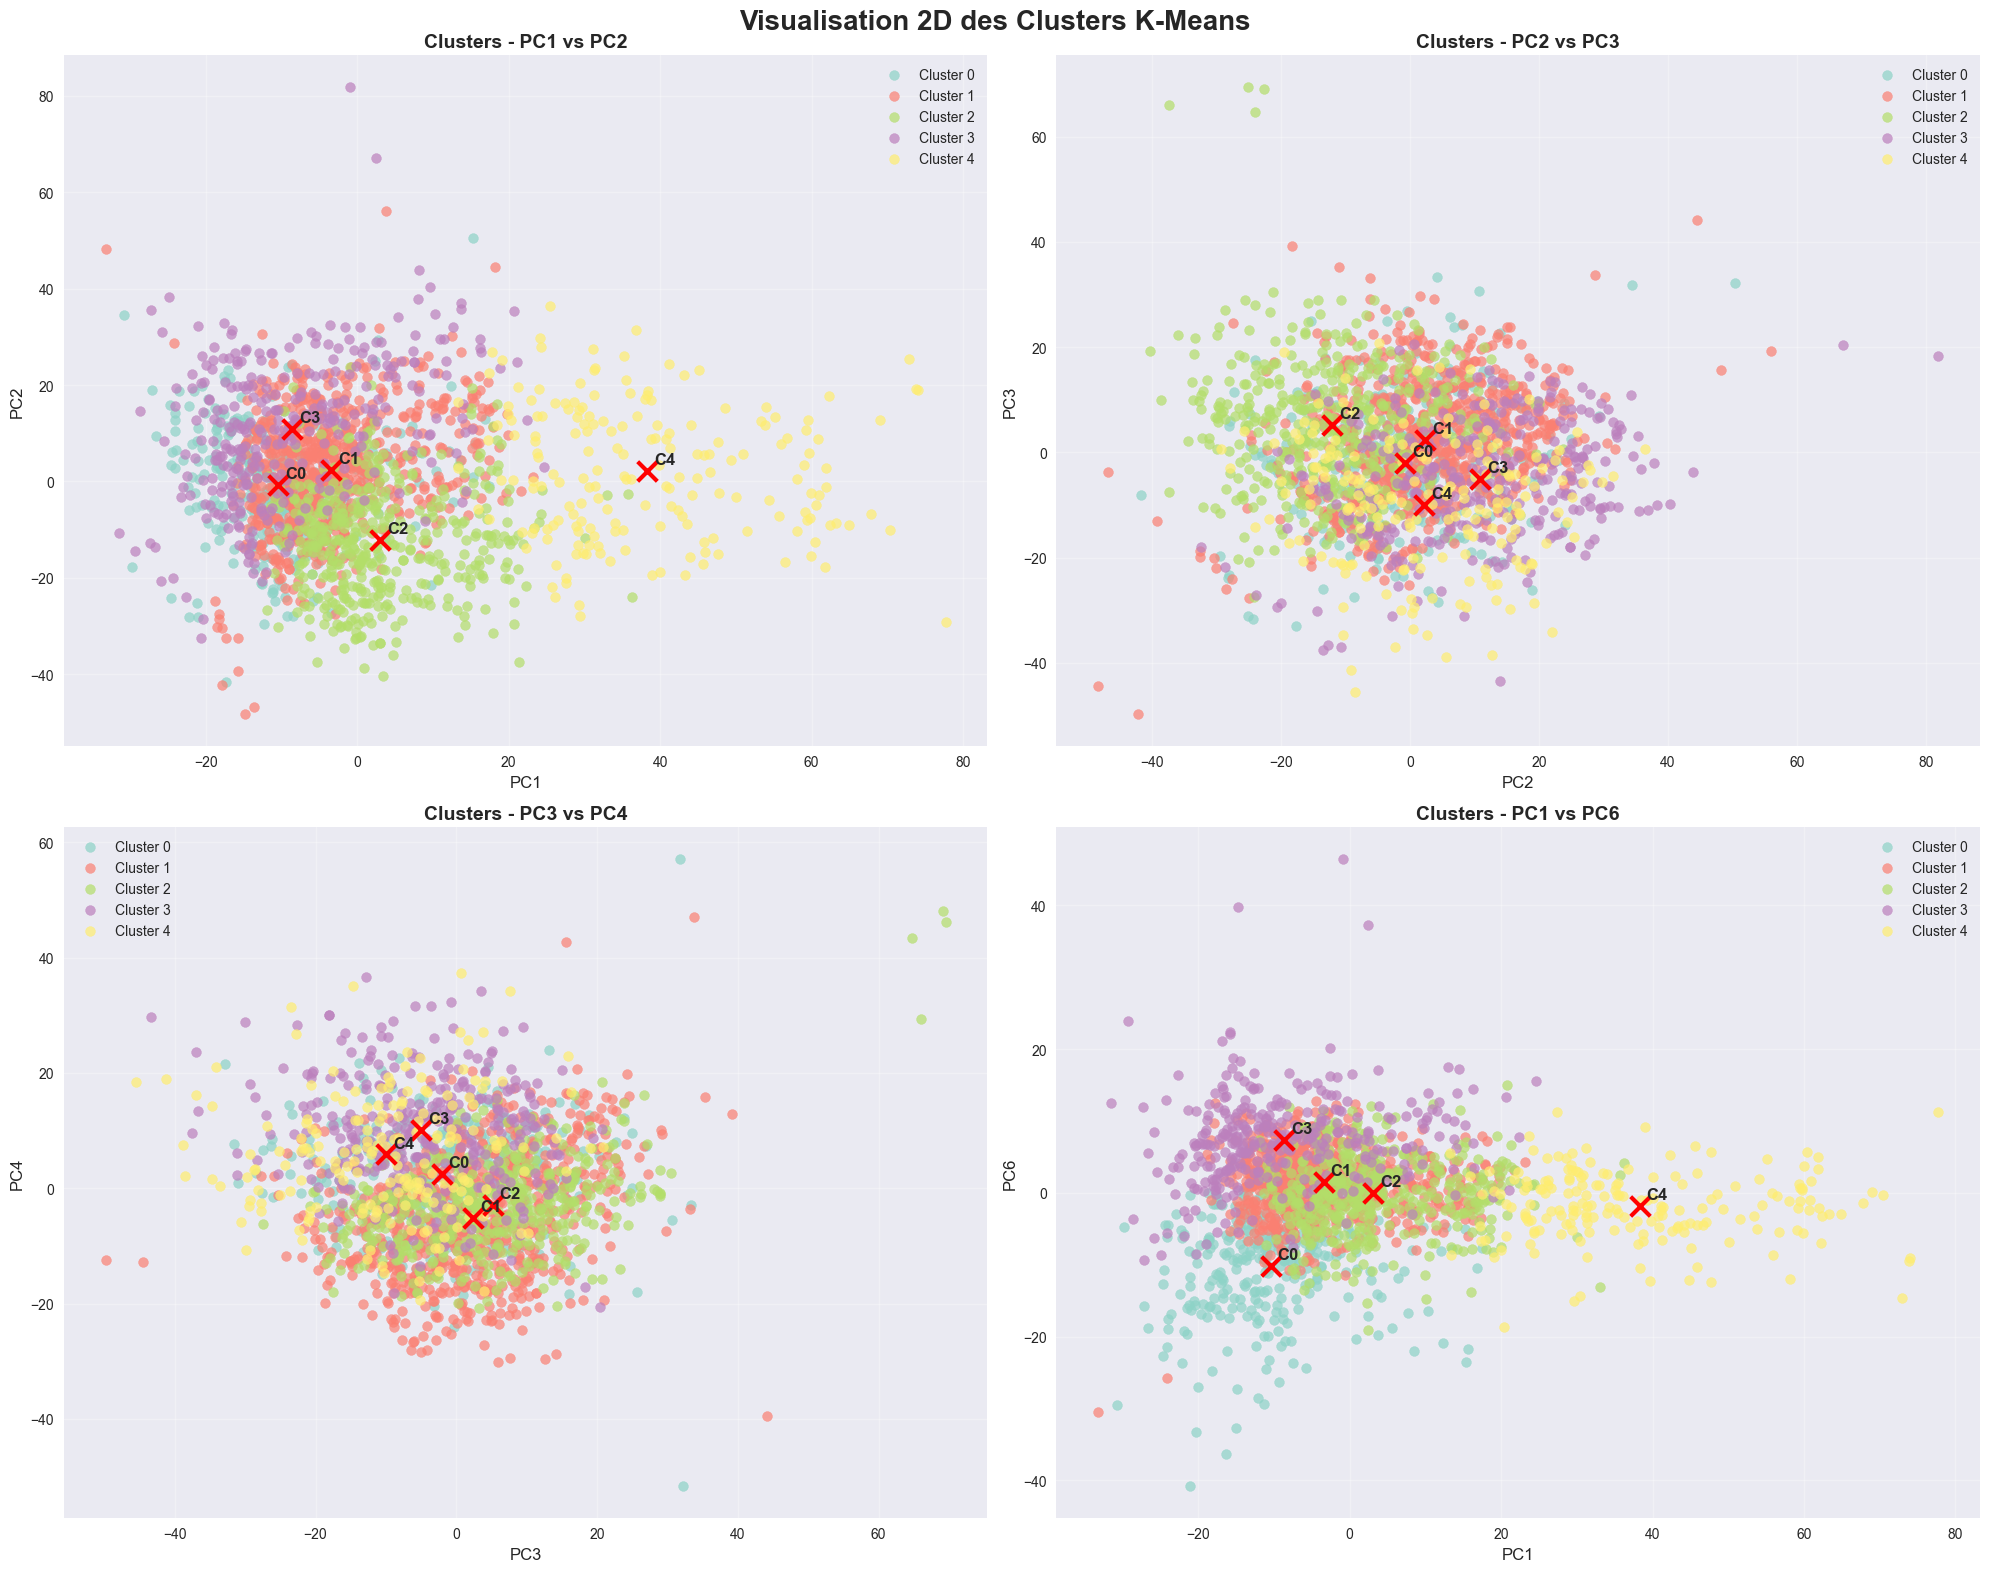

In [32]:
# Visualisations 2D des clusters - Version adaptative
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Visualisation 2D des Clusters K-Means', fontsize=20, fontweight='bold')

# Sélectionner les paires de features les plus intéressantes pour la visualisation
viz_features = features_for_clustering[:min(6, len(features_for_clustering))]

# Créer des paires de features pour les 4 graphiques
viz_pairs = []
if len(viz_features) >= 2:
    viz_pairs.append((viz_features[0], viz_features[1]))
if len(viz_features) >= 4:
    viz_pairs.append((viz_features[1], viz_features[2]))
    viz_pairs.append((viz_features[2], viz_features[3]))
if len(viz_features) >= 3:
    viz_pairs.append((viz_features[0], viz_features[-1]))

# Si moins de 4 paires, compléter avec les features disponibles
while len(viz_pairs) < 4 and len(viz_features) >= 2:
    viz_pairs.append((viz_features[min(len(viz_pairs), len(viz_features)-2)], 
                     viz_features[min(len(viz_pairs)+1, len(viz_features)-1)]))

# Palette de couleurs pour les clusters
colors = plt.cm.Set3(np.linspace(0, 1, optimal_k))

# Créer un DataFrame avec les données clusterisées pour la visualisation
data_clustered = clustering_data.copy()
data_clustered['Cluster'] = cluster_labels

# Centroïdes transformés en valeurs originales
centroids_original = scaler.inverse_transform(final_kmeans.cluster_centers_)

# Créer les 4 graphiques avec les paires de features dynamiques
axes_list = [axes[0,0], axes[0,1], axes[1,0], axes[1,1]]
for idx, (ax, (feat1, feat2)) in enumerate(zip(axes_list, viz_pairs[:4])):
    feat1_idx = features_for_clustering.index(feat1)
    feat2_idx = features_for_clustering.index(feat2)
    
    # Tracer les points de chaque cluster
    for cluster_id in range(optimal_k):
        cluster_mask = cluster_labels == cluster_id
        ax.scatter(data_clustered[cluster_mask][feat1], 
                   data_clustered[cluster_mask][feat2],
                   c=[colors[cluster_id]], 
                   label=f'Cluster {cluster_id}',
                   alpha=0.7, s=50)

    # Tracer les centroïdes
    for i, centroid in enumerate(centroids_original):
        ax.scatter(centroid[feat1_idx], centroid[feat2_idx], c='red', marker='x', s=200, linewidths=3)
        ax.annotate(f'C{i}', (centroid[feat1_idx], centroid[feat2_idx]), xytext=(5, 5), 
                    textcoords='offset points', fontweight='bold', fontsize=12)

    ax.set_xlabel(f'{feat1}', fontsize=12)
    ax.set_ylabel(f'{feat2}', fontsize=12)
    ax.set_title(f'Clusters - {feat1} vs {feat2}', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

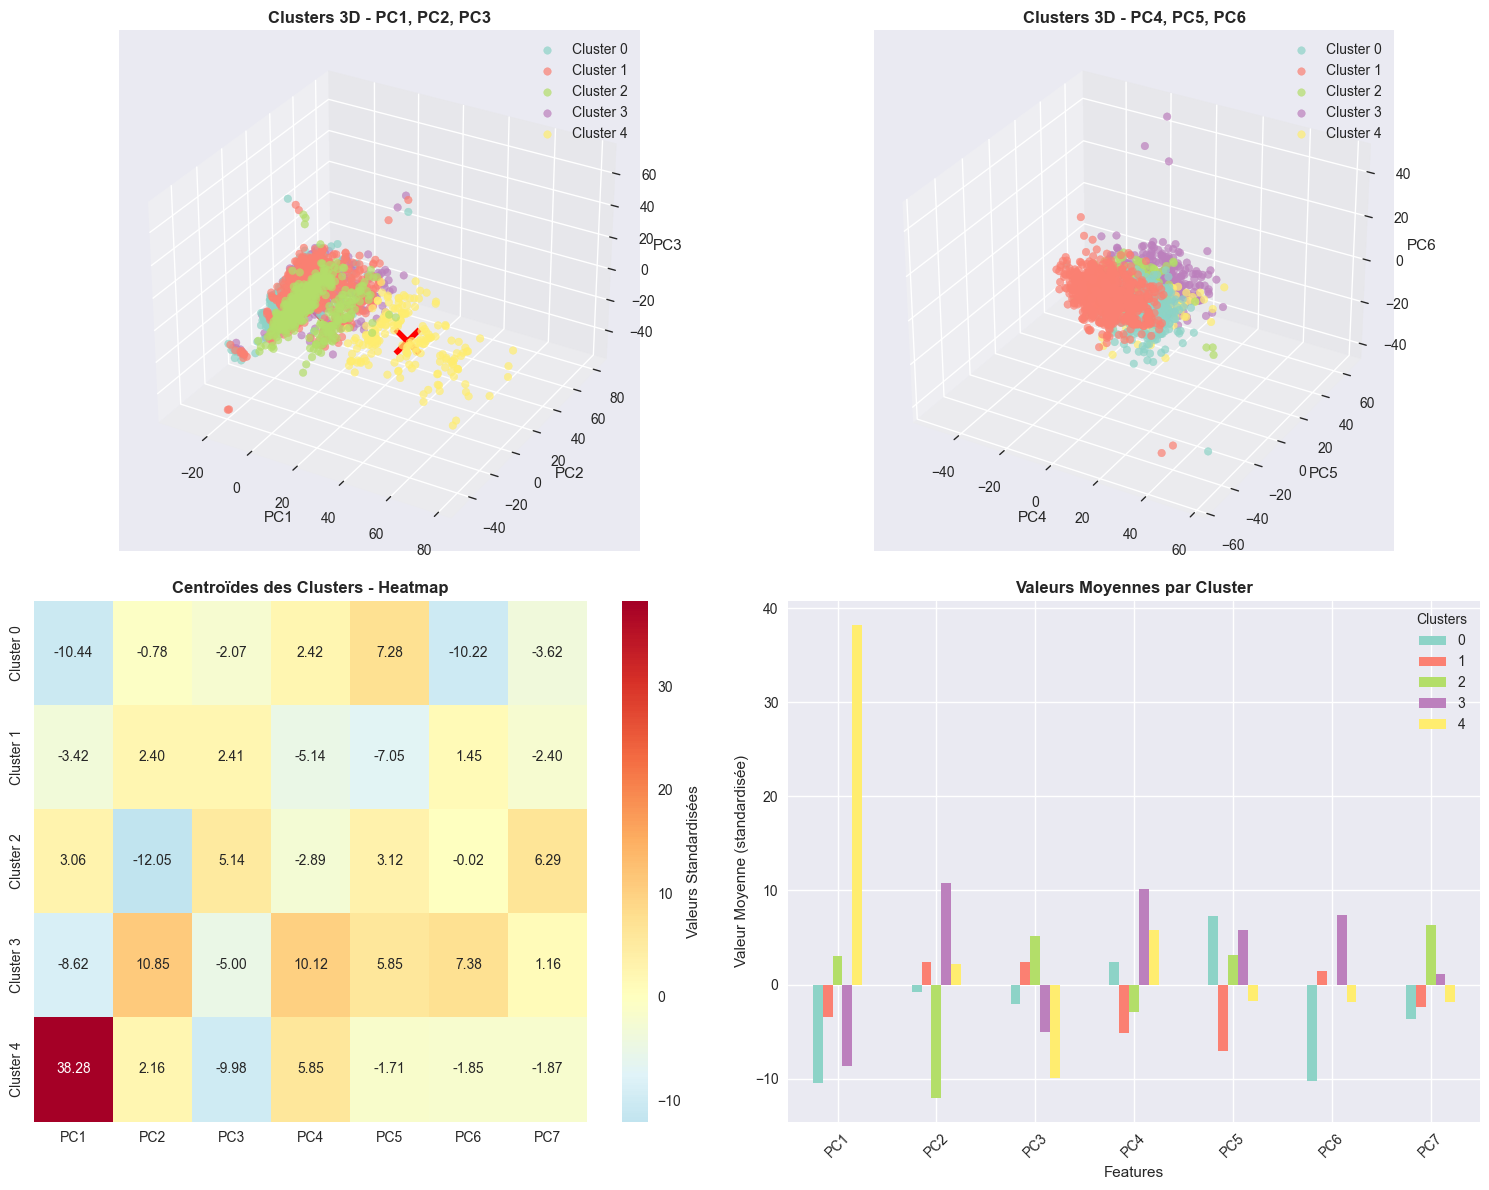

📊 Visualisations des clusters terminées!


In [33]:
# Visualisation 3D des clusters - Version adaptative
fig = plt.figure(figsize=(15, 12))

# Créer des triplets de features pour les visualisations 3D si on a assez de features
if len(viz_features) >= 3:
    # Premier triplet 3D
    ax1 = fig.add_subplot(221, projection='3d')
    feat1, feat2, feat3 = viz_features[0], viz_features[1], viz_features[2]
    feat1_idx = features_for_clustering.index(feat1)
    feat2_idx = features_for_clustering.index(feat2)
    feat3_idx = features_for_clustering.index(feat3)
    
    for cluster_id in range(optimal_k):
        cluster_mask = cluster_labels == cluster_id
        ax1.scatter(data_clustered[cluster_mask][feat1], 
                   data_clustered[cluster_mask][feat2],
                   data_clustered[cluster_mask][feat3],
                   c=[colors[cluster_id]], 
                   label=f'Cluster {cluster_id}',
                   alpha=0.7, s=30)

    # Centroïdes 3D
    for i, centroid in enumerate(centroids_original):
        ax1.scatter(centroid[feat1_idx], centroid[feat2_idx], centroid[feat3_idx], 
                   c='red', marker='x', s=300, linewidths=4)

    ax1.set_xlabel(feat1)
    ax1.set_ylabel(feat2)
    ax1.set_zlabel(feat3)
    ax1.set_title(f'Clusters 3D - {feat1}, {feat2}, {feat3}', fontweight='bold')
    ax1.legend()

    # Deuxième triplet 3D si on a assez de features
    if len(viz_features) >= 6:
        ax2 = fig.add_subplot(222, projection='3d')
        feat4, feat5, feat6 = viz_features[3], viz_features[4], viz_features[5]
        feat4_idx = features_for_clustering.index(feat4)
        feat5_idx = features_for_clustering.index(feat5)
        feat6_idx = features_for_clustering.index(feat6)
        
        for cluster_id in range(optimal_k):
            cluster_mask = cluster_labels == cluster_id
            ax2.scatter(data_clustered[cluster_mask][feat4], 
                       data_clustered[cluster_mask][feat5],
                       data_clustered[cluster_mask][feat6],
                       c=[colors[cluster_id]], 
                       label=f'Cluster {cluster_id}',
                       alpha=0.7, s=30)

        # Centroïdes 3D pour le deuxième triplet
        for i, centroid in enumerate(centroids_original):
            ax2.scatter(centroid[feat4_idx], centroid[feat5_idx], centroid[feat6_idx], 
                       c='red', marker='x', s=300, linewidths=4)

        ax2.set_xlabel(feat4)
        ax2.set_ylabel(feat5)
        ax2.set_zlabel(feat6)
        ax2.set_title(f'Clusters 3D - {feat4}, {feat5}, {feat6}', fontweight='bold')
        ax2.legend()

# Heatmap des centroïdes
ax3 = fig.add_subplot(223)
centroids_df = pd.DataFrame(centroids_original, 
                           columns=features_for_clustering,
                           index=[f'Cluster {i}' for i in range(optimal_k)])

sns.heatmap(centroids_df, annot=True, cmap='RdYlBu_r', center=0, 
           fmt='.2f', ax=ax3, cbar_kws={'label': 'Valeurs Standardisées'})
ax3.set_title('Centroïdes des Clusters - Heatmap', fontweight='bold')

# Distribution des clusters par feature
ax4 = fig.add_subplot(224)
cluster_means = data_clustered.groupby('Cluster')[features_for_clustering].mean()
cluster_means.T.plot(kind='bar', ax=ax4, color=colors[:optimal_k])
ax4.set_title('Valeurs Moyennes par Cluster', fontweight='bold')
ax4.set_xlabel('Features')
ax4.set_ylabel('Valeur Moyenne (standardisée)')
ax4.legend(title='Clusters')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("📊 Visualisations des clusters terminées!")

## 🎯 Conclusions et Recommandations

### Résultats du Clustering K-Means

Cette analyse de clustering non supervisé a permis d'identifier des segments distincts de clients basés sur leurs caractéristiques comportementales et démographiques. 

**Points clés :**

1. **Nombre optimal de clusters** : Déterminé grâce à l'analyse du coude et du score de silhouette
2. **Qualité du clustering** : Évaluée avec plusieurs métriques (silhouette, Calinski-Harabasz, stabilité)
3. **Profils de segments** : Chaque cluster présente des caractéristiques distinctes en termes d'âge, revenus, dépenses, etc.

### Recommandations Business

Les segments identifiés peuvent être utilisés pour :

- **Stratégies marketing ciblées** : Adapter les campagnes selon les profils de chaque segment
- **Personnalisation de l'offre** : Proposer des produits/services adaptés à chaque groupe
- **Optimisation des ressources** : Concentrer les efforts sur les segments les plus rentables
- **Prédiction comportementale** : Anticiper les besoins futurs de chaque segment

### Prochaines Étapes

1. Valider les segments avec des experts métier
2. Implémenter des stratégies différenciées par segment
3. Monitorer l'évolution des segments dans le temps
4. Enrichir l'analyse avec des données additionnelles
5. Tester d'autres algorithmes de clustering (DBSCAN, clustering hiérarchique)

In [34]:
# Sauvegarde des résultats du clustering
print("💾 Sauvegarde des résultats...")

# Sauvegarde du dataset avec les labels de clusters
output_file = 'data/processed/marketing_campaign_clustered.csv'
data_clustered.to_csv(output_file, index=False)
print(f"✅ Dataset avec clusters sauvegardé: {output_file}")

# Sauvegarde des centroïdes
centroids_df = pd.DataFrame(centroids_original, 
                           columns=features_for_clustering,
                           index=[f'Cluster_{i}' for i in range(optimal_k)])
centroids_file = 'data/processed/cluster_centroids.csv'
centroids_df.to_csv(centroids_file)
print(f"✅ Centroïdes sauvegardés: {centroids_file}")

# Résumé des métriques de performance
performance_metrics = {
    'optimal_k': optimal_k,
    'silhouette_score': silhouette_avg,
    'calinski_harabasz_score': calinski_harabasz,
    'inertia': inertia,
    'stability_score': avg_stability,
    'min_centroid_distance': min_distance
}

metrics_df = pd.DataFrame([performance_metrics])
metrics_file = 'data/processed/clustering_performance_metrics.csv'
metrics_df.to_csv(metrics_file, index=False)
print(f"✅ Métriques de performance sauvegardées: {metrics_file}")

print(f"\n🎉 Analyse de clustering K-means terminée avec succès!")
print(f"📊 {optimal_k} clusters identifiés sur {len(data_clustered)} clients")
print(f"📈 Score de silhouette: {silhouette_avg:.3f}")
print(f"🔧 Modèle prêt pour l'utilisation en production")

💾 Sauvegarde des résultats...
✅ Dataset avec clusters sauvegardé: data/processed/marketing_campaign_clustered.csv
✅ Centroïdes sauvegardés: data/processed/cluster_centroids.csv
✅ Métriques de performance sauvegardées: data/processed/clustering_performance_metrics.csv

🎉 Analyse de clustering K-means terminée avec succès!
📊 5 clusters identifiés sur 2029 clients
📈 Score de silhouette: 0.156
🔧 Modèle prêt pour l'utilisation en production
